# **PH509: Lab 3 Assignment**

##PH509 QM Lab 3B

**Schrodinger equation in 1D:**

1. Use the **Shooting method** to obtain the lowest six energy levels for an infinite square well, and their corresponding **normalized** wavefunctions. Take the box to have walls at $x = \pm 1$. This will require a program that can deal with even-parity and odd-parity solutions.

a. Examine how the energy varies with the quantum number n. \
b. Compare the wavefunctions with the exact solutions. \
c. How does the ground-state energy vary with the choice of step-size $\Delta x$. Try $\Delta x = 0.05, 0.01, 0.005$ \
d. Modify your program for the ground state and first excited states for a nucleon in a box (finite potential well) with $V(x)$ given by
$$V(x) = \begin{cases}
    V_0 = -83 MeV, & \text{if$ \ |x| \leq 2 \ fm$}.\\
    0, & \text{otherwise}.
  \end{cases}$$  
What are the corresponding energy eigenvalues (in MeV)? How many eigenstates does this finite potential well have?


2. Use the Shooting method to calculate the energy levels for the potential $V(x) = x^n$ for different values of n.
Demonstrate how the energy levels approximate an infinite square well for large n. How do you 'intuitively' understand this result?

##LAB 3B Question 1:

### Part A, B and C: **Schrodinger equation for infinite potential well:**

here, given that, we have a particle inside finite potential well in region $|x| \leq L$
$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi + V(x)\psi = E\psi$$
$\Rightarrow$ $$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi = E\psi$$

taking $u = \frac{x}{L}$

$$\frac{-\hbar^2}{2mL^2}\frac{d^2}{du^2}\psi = E\psi$$

$$\frac{d^2}{du^2}\psi = \frac{E}{\frac{-\hbar^2}{2mL^2}}\psi$$

using, $$E = \frac{\alpha\hbar^2}{8mL^2}$$

we get,
for $|x| \leq 1$
$$\frac{d^2}{du^2}\psi = -\frac{\alpha}{4}\psi$$

we have to found $\alpha$ using shooting method, and corresponding wavefunctions.

The analytical wavefunctions for this case is given by:
$$\psi_{even}(x) = \sqrt{2}\cos{\frac{n\pi x}{2}}$$

$$\psi_{odd}(x) = \sqrt{2}\sin{\frac{n\pi x}{2}}$$


In [ ]:
#importing the necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
from scipy import optimize
import matplotlib.pyplot as plt

In [ ]:
#setting the values for one half of the square-well as the Potential is symmetric :

xi_0 = 0.0
xi_f = 1.0

h = 0.001
xi = np.linspace(xi_0, xi_f, int((xi_f- xi_0)/h)+1)
#print(xi)

In [ ]:
# defining a function to get the values of 1st and 2nd derivative of wavefunction psi :

def dzd_xi(t, z, params):
    psi, phi = z
    alpha = params


    d_psi_d_xi = phi
    d_phi_d_xi = -(alpha/4) * psi

    return [d_psi_d_xi, d_phi_d_xi]

In [ ]:
# First we find the even parity solutions :
# setting the initial conditions for the even parity solution :

psi_init = 0.5        # arbitrary value of psi(xi_0)
d_psi_d_xi_init = 0.0   # the other initial condition at xi_0
z0 = [psi_init, d_psi_d_xi_init]

# defining a function for getting the value of the paticle wavefunction for a particular Energy :

def func(E) :

  params = E

  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
  psi_bdry = psi_sol.y[0][-1]

  return  psi_bdry

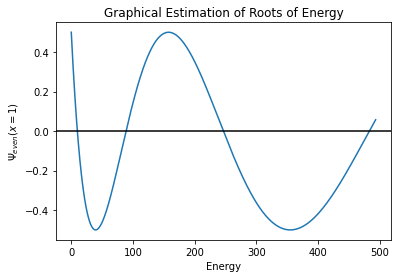

In [ ]:
# plot between psi(even) at xi=1 and the different Energy values:

dE = 0.1
E_array = np.arange(0 , 50*(np.pi)**2 +dE , dE)
psi_bdry_array = np.zeros(len(E_array))

for i in range(0 , len(E_array)) :
  psi_bdry_array[i] = func(E_array[i])

plt.plot(E_array , psi_bdry_array)
plt.title( "Graphical Estimation of Roots of Energy")
plt.xlabel('Energy')
plt.ylabel( r'$\Psi_{even}(x = 1)$')
plt.axhline(c = "k")

In [ ]:
# finding the roots of energy values for which psi(xi=1) = 0 using the secant method :

def root_secant(f, a, b, eps, N):

    condn = True
    n = 1

    while (condn):

        r = a - (b-a)*f(a)/( f(b) - f(a) )

        #-- change the interval
        a = b
        b = r

        #-- increment the number of steps
        n = n + 1

        if n > N:
            raise ValueError("Convergence not found in %d steps! \n" %(N))

        condn = abs(f(r)) > eps

    return r, n

In [ ]:
#printing the roots of even parity

rootalpha_odd = np.zeros(4)
#Roots
j = 0
for i in [0., 50., 200., 450.] :
  r, n = root_secant(func, i, i + 50., 1e-8, 100)
  print("root = %.8f, found in %d steps" %(r, n))
  rootalpha_odd[j] = r
  j = j+1
  print("value of j:", j)

root = 9.86856763, found in 12 steps
value of j: 1
root = 88.78581862, found in 5 steps
value of j: 2
root = 246.60991401, found in 4 steps
value of j: 3
root = 483.34838373, found in 4 steps
value of j: 4


In [ ]:
#Storing the roots in new array so that we can store both even and odd parity roots in one single array

allroots = np.zeros(8)
j = 0
for i in [0, 1, 2, 3]:
  allroots[2*j + 1] = rootalpha_odd[i]
  j = j+1

print(allroots)

[  0.           9.86856763   0.          88.78581862   0.
 246.60991401   0.         483.34838373]


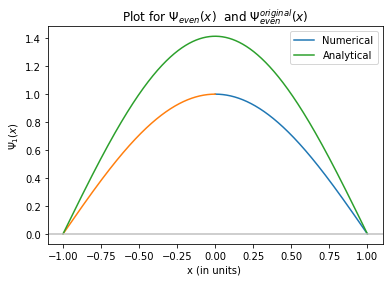

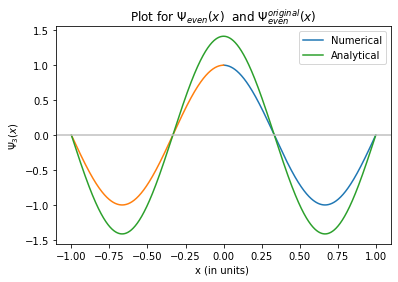

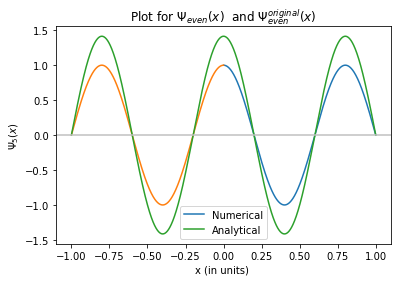

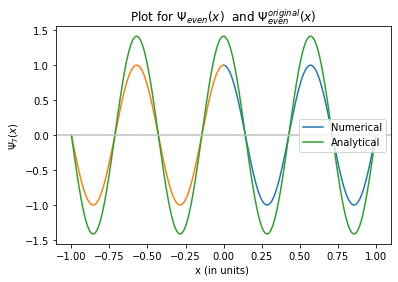

In [ ]:
#Plotting Normalized wavefunctions, found using shooting method and analytical, of even parity:

for i in [0, 1, 2, 3]:

  params = rootalpha_odd[i]
  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)

  #Normalization constant found using integration:

  psi_whole = np.append(np.flip(psi_sol.y[0]), psi_sol.y[0])
  xi_whole = np.append(-np.flip(psi_sol.t), psi_sol.t)
  I = np.array(psi_whole)*np.array(psi_whole)               #Psi^2
  A = np.trapz(I, x=xi_whole)                   #integration using Numpy in-built function "trapz"
  normal_const = 1./np.sqrt(A)                  #Normalization constant

  plt.figure()
  plt.plot(psi_sol.t, normal_const*psi_sol.y[0], label = 'Numerical')
  plt.plot(-np.flip(psi_sol.t) , normal_const*np.flip(psi_sol.y[0])) #-- even parity
  plt.plot(xi_whole, np.sqrt(2)*np.cos((2*i + 1)*(np.pi/2)*xi_whole), label = 'Analytical')
  plt.plot()
  plt.axhline(0, color='silver')
  plt.xlabel('x (in units) ')
  plt.ylabel('$\Psi_{%d}(x)$' %(2*i+1))
  plt.title(r'Plot for $\Psi_{even}(x)$  and $\Psi^{original}_{even}(x)$')
  plt.legend()
  plt.xlim
  plt.show()

In [ ]:
# Now we find the odd parity solutions :
# setting the initial conditions for the odd parity solution :

psi_init = 0        # arbitrary value of psi(xi_0)
d_psi_d_xi_init = 0.5   # the other initial condition at xi_0
z0 = [psi_init, d_psi_d_xi_init]

# defining a function for getting the value of the paticle wavefunction for a particular Energy :

def func(E) :

  params = E

  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
  psi_bdry = psi_sol.y[0][-1]

  return  psi_bdry

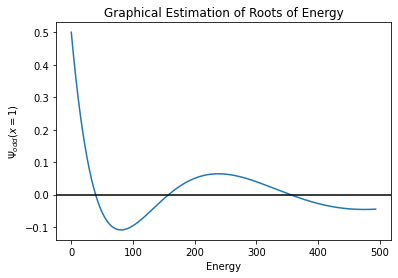

In [ ]:
# plot between psi(even) at xi=1 and the different Energy values:

dE = 0.1
E_array = np.arange(0 , 50*(np.pi)**2 +dE , dE)
psi_bdry_array = np.zeros(len(E_array))

for i in range(0 , len(E_array)) :
  psi_bdry_array[i] = func(E_array[i])

plt.plot(E_array , psi_bdry_array)
plt.title( "Graphical Estimation of Roots of Energy")
plt.xlabel('Energy')
plt.ylabel( r'$\Psi_{odd}(x = 1)$')
plt.axhline(c = "k")

axis_x = [l for l in range(0, 500, 25)]
values = range(len(axis_x))

In [ ]:
#printing the roots of odd parity:

rootalpha_even = np.zeros(4)
#Roots
j = 0
for i in [30., 120., 350.] :
  r, n = root_secant(func, i, i + 50., 1e-8, 100)
  print("root = %.8f, found in %d steps" %(r, n))
  rootalpha_even[j] = r
  j = j+1
  print("value of j:", j)

root = 39.46388198, found in 9 steps
value of j: 1
root = 157.83649472, found in 5 steps
value of j: 2
root = 355.11824178, found in 5 steps
value of j: 3


In [ ]:
#Storing the roots in new array so that we can store both even and odd parity roots in one single array

j = 0
for i in [0, 1, 2]:
  allroots[2*j + 2] = rootalpha_even[i]
  j = j+1

print(allroots)

[  0.           9.86856763  39.46388198  88.78581862 157.83649472
 246.60991401 355.11824178 483.34838373]


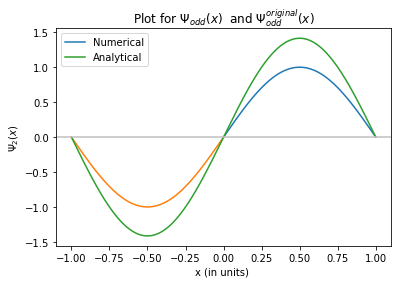

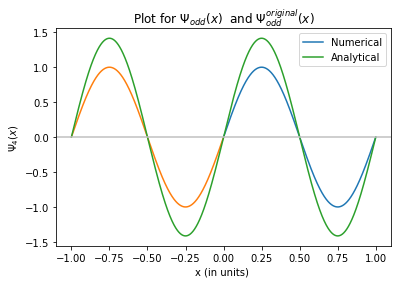

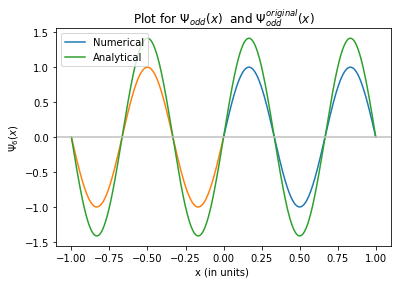

In [ ]:
#Plotting Normalized wavefunctions, found using shooting method and analytical, of odd parity:

for i in [0, 1, 2]:
#alpha = rootalpha
  params = rootalpha_even[i]
  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)

  #Normalization constant found using integration:

  psi_whole = np.append(-np.flip(psi_sol.y[0]), psi_sol.y[0])
  xi_whole = np.append(-np.flip(psi_sol.t), psi_sol.t)
  I = np.array(psi_whole)*np.array(psi_whole)               #Psi^2
  A = np.trapz(I, x=xi_whole)               #integration using Numpy in-built function
  normal_const = 1./np.sqrt(A)              #Normalization constant

  plt.figure()
  plt.plot(psi_sol.t, normal_const*psi_sol.y[0], label = 'Numerical')
  plt.plot(-np.flip(psi_sol.t) , normal_const*(-np.flip(psi_sol.y[0]))) #-- odd parity
  plt.plot(xi_whole, np.sqrt(2)*np.sin((2*i + 2)*(np.pi/2)*xi_whole), label = 'Analytical')   #Analytical solution
  plt.axhline(0, color='silver')
  plt.xlabel('x (in units) ')
  plt.ylabel('$\Psi_{%d}(x)$' %(2*i+2))
  plt.title(r'Plot for $\Psi_{odd}(x)$  and $\Psi^{original}_{odd}(x)$')
  plt.legend()
  plt.xlim
  plt.show()

[1. 2. 3. 4. 5. 6. 7.]


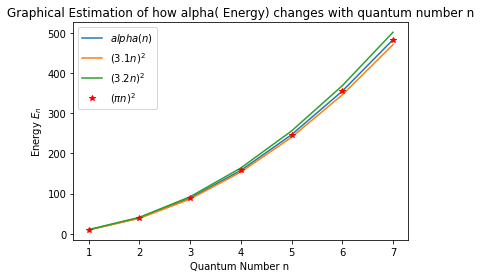

In [ ]:
#Estimation of variation of Energy with quantum number n

n = np.linspace(1, 7, 7)
print(n)
plt.plot(n, np.delete(np.array(allroots), 0), label = '$alpha(n)$')
plt.plot(n, (3.1*n)**2, '-', label = '$(3.1n)^2$')
plt.plot(n, (3.2*n)**2, '-', label = '$(3.2n)^2$')
plt.plot(n, (np.pi*n)**2, '*r', label = '$(\pi n)^2$')
plt.xlabel('Quantum Number n ')
plt.ylabel('Energy $E_n$')
plt.title( "Graphical Estimation of how alpha( Energy) changes with quantum number n")
plt.legend()

From above computing, we found that the value of $\alpha$ is: $$\alpha = n^2 \pi^2$$ where m is the quantum number.
and we get energies as $$E_n = \frac{n^2 \pi^2 \hbar^2}{8mL^2}$$. which completely agrees with analytical result for infinite potential well.


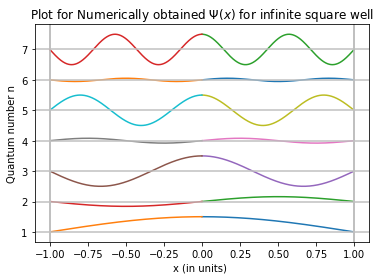

In [ ]:
#plotting wavefunctions for all the quantum number(upto 7) found using shooting method

for i in [1, 2, 3, 4, 5, 6, 7]:
#alpha = rootalpha
  if i % 2 == 0:
    psi_init = 0.0        # arbitrary value of psi(xi_0)
    d_psi_d_xi_init = 0.5   # the other initial condition at xi_0
    z0 = [psi_init, d_psi_d_xi_init]
    params = allroots[i]
    psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
    plt.plot(psi_sol.t, psi_sol.y[0] + i)
    plt.plot(-np.flip(psi_sol.t) , (-np.flip(psi_sol.y[0])) + i) #-- odd parity
    plt.axhline(0 + i, color='silver')
  else:
    psi_init = 0.5        # arbitrary value of psi(xi_0)
    d_psi_d_xi_init = 0.0   # the other initial condition at xi_0
    z0 = [psi_init, d_psi_d_xi_init]
    params = allroots[i]
    psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
    plt.plot(psi_sol.t, (psi_sol.y[0])+i)
    plt.plot(-np.flip(psi_sol.t), (np.flip(psi_sol.y[0])) + i)
    plt.axhline(0 + i, color='silver')
    plt.axvline(-1, color = 'silver')
    plt.axvline(1, color = 'silver')
  plt.xlabel('x (in units) ')
  plt.ylabel('Quantum number n')
  plt.title(r'Plot for Numerically obtained $\Psi(x)$ for infinite square well')
  #plt.legend()
  plt.xlim
#plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

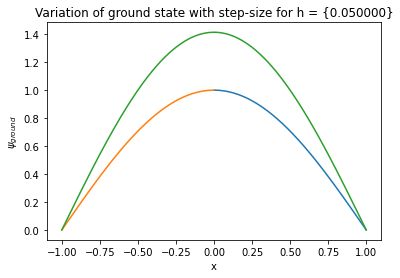

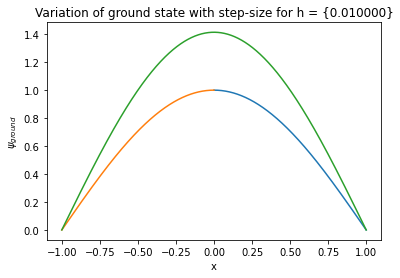

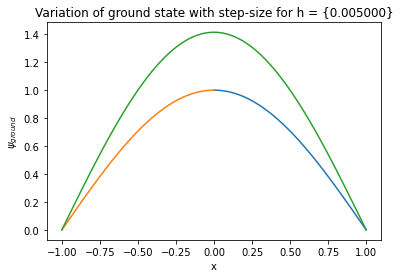

In [ ]:
#plotting ground state solution for different step-sizes (for: 0.05, 0.01, 0.005)

psi_init = 0.5        # arbitrary value of psi(xi_0)
d_psi_d_xi_init = 0.0   # the other initial condition at xi_0
z0 = [psi_init, d_psi_d_xi_init]
for h in [0.05, 0.01, 0.005]:                #given step sizes
  params = rootalpha_odd[0]
  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)

  psi_whole = np.append(np.flip(psi_sol.y[0]), psi_sol.y[0])
  xi_whole = np.append(-np.flip(psi_sol.t), psi_sol.t)
  I = np.array(psi_whole)*np.array(psi_whole)               #Psi^2
  A = np.trapz(I, x=xi_whole)               #integration
  normal_const = 1./np.sqrt(A)

  plt.figure()
  plt.plot(psi_sol.t, normal_const*psi_sol.y[0])
  plt.plot(-np.flip(psi_sol.t) , normal_const*np.flip(psi_sol.y[0]))
  plt.plot(xi_whole, np.sqrt(2)*np.cos((np.pi/2)*xi_whole))
  plt.xlabel('x')
  plt.ylabel('$\psi_{ground}$')
  plt.title('Variation of ground state with step-size for h = %f.3' %h)
  plt.xlim
  #plt.rcParams['figure.figsize'] = [5, 4]
  plt.show()

we observe that there is not much variation in wavefunction for given step-sizes because the given step-sizes are already very small. Also, if the difference between step-sizes was fairly large then only we could have observed some differences.

### Part D: **Schrodinger equation inside finite potential well:**

here, given that, we have a nucleon inside finite potential well in region $|x| \leq 2 fm$
$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi + V(x)\psi = E\psi$$
$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi + V_o\psi = E\psi$$

using $L = 2fm $ as a scale we have: $\epsilon = \frac{x}{L}$
$$\frac{-\hbar^2}{2mL^2}\frac{d^2}{d\epsilon^2}\psi + V_o\psi = E\psi$$
$$\frac{-\hbar^2}{2mL^2}\frac{d^2}{d\epsilon^2}\psi = (E - V_o)\psi$$

given, $V_0 = -83 \ MeV$
$$\frac{-\hbar^2}{2mL^2}\frac{d^2}{d\epsilon^2}\psi = (E + 83)\psi$$
$$\frac{d^2}{d\epsilon^2}\psi = \frac{(E + 83)}{\frac{-\hbar^2}{2mL^2}}\psi$$

Now, we determine the value of $\frac{\hbar^2}{2mL^2}$
$$\frac{\hbar^2}{2mL^2} = \frac{\hbar^2c^2}{2mc^2L^2}$$

some standard values:
$$\hbar c = 197.32 \ MeV fm$$
$$\hbar^2 c^2 = 38935.19 \ MeV^2 fm^2$$
$$ m_{nucleon} c^2 = 938 \ MeV $$
$$L^2= 4 \ fm^2$$

$$\frac{\hbar^2}{2mL^2} = \frac{\hbar^2c^2}{2mc^2L^2} \approx 5.18$$
$$\frac{d^2}{d\epsilon^2}\psi = -(\frac{E}{\frac{\hbar^2}{2mL^2}}+ \frac{83}{\frac{\hbar^2}{2mL^2}} )\psi$$

Now, Taking $$E = -\frac{\alpha\hbar^2}{2mL^2}$$
We have,
for  $|\epsilon| \leq 1$ $$\frac{d^2}{d\epsilon^2}\psi \simeq (\alpha - 16 )\psi$$ \\
We have to find the values of $\alpha$ using shooting method at boundary of potential wells to determine the energies of bound state. For the E we have chosen, for bound states, the value of $\alpha$ has to be strictly positive. Since, for this case, $E$ has to be negative.

### **Schrodinger equation outside finite potential well:**

Thus, we have
$$\psi^{''} = \frac{2m |E|}{\hbar^2}\psi$$

adimensionalizing, by using a characteristic length $L'$:
where, $L' = L/\sqrt{a}$

we choose $a$ in such a way that $L' < L$ like $a = 5, 10,...$. Since, This is a characteristic length which does essentially nothing new but what this quantity does for you is give you a sense of scale for what you are dealing with. We know that outside the well, we have tunneling effect to deal with. Since, tunneling effect is a low range effect, by choosing a characteristic length much smaller than charcteristic length of well. We can observe the effect of tunneling in our plot in a better way.

$$\psi^{''} = \frac{2m |E| L'^2}{\hbar^2}\psi$$

using,
$$E = -\frac{\alpha\hbar^2}{2mL^2}$$

we get,
$$\psi^{''}(\epsilon) = \frac{\alpha}{a}\psi(\epsilon)$$

and for this case we have solution:
$$\psi(\epsilon) \simeq \exp(\frac{-\alpha}{a}\epsilon)$$


at boundary we have $\epsilon = 1$
so, we have to shoot the values of energy for boundary condition:


$\Rightarrow$ $$\psi_{inside}(\epsilon  = 1) - \psi_{outside}(\epsilon = 1) = 0$$
$\Rightarrow$ $$\psi_{inside}(\epsilon  = 1) - exp(\frac{-\alpha}{a}) = 0$$

The wavefunction at particular energy E must satisfy this above condition to be an accepted bound state.

In [ ]:
#setting the values for one half of the square-well as the Potential is symmetric :

xi_0 = 0.0
xi_f = 1.0

h = 0.001
xi = np.linspace(xi_0, xi_f, int((xi_f- xi_0)/h)+1)
#print(xi)

In [ ]:
# defining a function to get the values of 1st and 2nd derivative of wavefunction psi :

def dzd_xi(t, z, params):
    psi, phi = z
    alpha = params


    d_psi_d_xi = phi
    d_phi_d_xi = (alpha - 16) * psi

    return [d_psi_d_xi, d_phi_d_xi]

In [ ]:
# First we find the even parity solutions :
# setting the initial conditions for the even parity solution :

psi_init = 0.5        # arbitrary value of psi(xi_0)
d_psi_d_xi_init = 0.0   # the other initial condition at xi_0
z0 = [psi_init, d_psi_d_xi_init]

# defining a function for getting the value of the paticle wavefunction for a particular Energy :

def func(E) :

  params = E

  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
  psi_bdry = psi_sol.y[0][-1] - np.exp(-E/10)                                    #Boundary condition

  return  psi_bdry

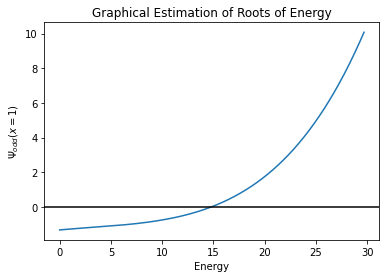

In [ ]:
# plot between psi at xi=1 and the different Energy values:

dE = 0.1
E_array = np.arange(0 , 3*(np.pi)**2 +dE , dE)
psi_bdry_array = np.zeros(len(E_array))

for i in range(0 , len(E_array)) :
  psi_bdry_array[i] = func(E_array[i])

plt.plot(E_array , psi_bdry_array)
plt.title( "Graphical Estimation of Roots of Energy")
plt.xlabel('Energy')
plt.ylabel( r'$\Psi_{odd}(x = 1)$')
plt.axhline(c = "k")

axis_x = [l for l in range(0, 500, 25)]
values = range(len(axis_x))

In [ ]:
#Printing root(s)

r, n = root_secant(func, 13., 16., 1e-8, 100)
root_in_well = r
print("root = %.8f, found in %d steps" %(r, n))

root = 14.79484475, found in 6 steps


In [ ]:
#Energy of the bound state:

Energy_in_well = -root_in_well*5.18
print(Energy_in_well)

-76.63729579141632


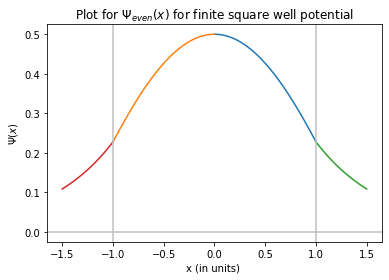

In [ ]:
#Plotting the bound state wavefunction corresponding to the energy found using shooting method

x_sec = np.linspace(1, 1.5, 1000)
params = root_in_well
psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
plt.figure()
plt.plot(psi_sol.t, psi_sol.y[0])
plt.plot(-np.flip(psi_sol.t) , np.flip(psi_sol.y[0]))
plt.plot(x_sec, np.exp(-1*(root_in_well/10)*x_sec))
plt.plot(-np.flip(x_sec), np.flip(np.exp(-1*(root_in_well/10)*x_sec)))
plt.axhline(0, color='silver')
plt.axvline(1, color='silver')                          #for vertical boundaries of potential well
plt.axvline(-1, color='silver')
plt.xlabel('x (in units) ')
plt.ylabel('$\Psi(x)$')
plt.title(r'Plot for $\Psi_{even}(x)$ for finite square well potential')
#plt.legend()
plt.xlim
plt.show()

In [ ]:
# Now we find the odd parity solutions :
# setting the initial conditions for the odd parity solution :

psi_init = 0        # arbitrary value of psi(xi_0)
d_psi_d_xi_init = 0.5   # the other initial condition at xi_0
z0 = [psi_init, d_psi_d_xi_init]

# defining a function for getting the value of the paticle wavefunction for a particular Energy :

def func(E) :

  params = E

  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
  psi_bdry = psi_sol.y[0][-1] - np.exp(-E/5)

  return  psi_bdry

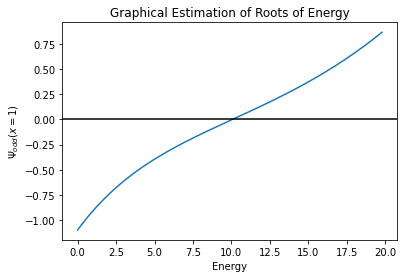

In [ ]:
# plot between psi(odd) at xi=1 and the different Energy values:

dE = 0.1
E_array = np.arange(0 , 2*(np.pi)**2 +dE , dE)
psi_bdry_array = np.zeros(len(E_array))

for i in range(0 , len(E_array)):
  psi_bdry_array[i] = func(E_array[i])

plt.plot(E_array , psi_bdry_array)
plt.title( "Graphical Estimation of Roots of Energy")
plt.xlabel('Energy')
plt.ylabel( r'$\Psi_{odd}(x = 1)$')
plt.axhline(c = "k")

In [ ]:
#printing root(s)

r, n = root_secant(func, 13., 16., 1e-8, 100)
root_in_well2 = r
print("root = %.8f, found in %d steps" %(r, n))

root = 10.07367440, found in 5 steps


In [ ]:
#Energy of the bound state for the corresponding root:

Energy_in_well2 = -root_in_well2*5.18
print(Energy_in_well2)

-52.18163341201983


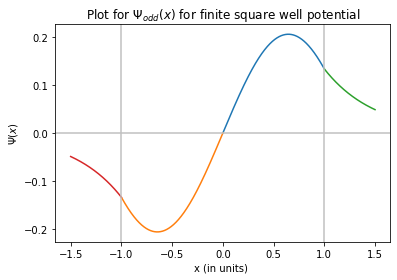

In [ ]:
#Plotting the bound state wavefunction corresponding to the energy found using shooting method:

x_sec = np.linspace(1, 1.5, 1000)
params = root_in_well2
psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi),max(xi)], y0=z0, t_eval=xi)
plt.figure()
plt.plot(psi_sol.t, psi_sol.y[0])
plt.plot(-np.flip(psi_sol.t) , -np.flip(psi_sol.y[0])) #-- odd parity
plt.plot(x_sec, np.exp(-1*(root_in_well2/5)*x_sec))
plt.plot(-np.flip(x_sec), -np.flip(np.exp(-1*(root_in_well2/5)*x_sec)))
plt.axhline(0, color='silver')
plt.axvline(1, color='silver')
plt.axvline(-1, color='silver')
plt.xlabel('x (in units) ')
plt.ylabel('$\Psi(x)$')
plt.title(r'Plot for $\Psi_{odd}(x)$ for finite square well potential')
#plt.legend()
plt.xlim
plt.show()

from above computing, we found that, for given system, we have two bound states, one of each parity with energies: $E_1 \simeq -76.637 MeV$ and $E_2 \simeq -52.181 MeV$. So, this potential well has two eigenstates.

Analytically, for finite potential well, approximate total number of bound states is given by:
$$N \approx \frac{\sqrt{2mV_0}d}{\hbar \pi}$$

Calculating for our case:
$$N \approx \frac{\sqrt{2mV_0}d}{\hbar \pi}$$
$$ = \frac{\sqrt{2mV_0}d}{\hbar \pi} = \frac{\sqrt{2mc^2V_0}d}{\hbar c \pi}$$
putting values: $\hbar c = 197.3 Mev fm$, $mc^2 = 938 MeV$, $d = 4fm$, $V_0 = 83 MeV$
$$N \approx \frac{\sqrt{2 \times 938 \times 83} \times 4}{197 \times 3.14} = 2.55$$
$$N \approx 2.55$$
So, total number of bound state is equal to $\lfloor {N} \rfloor = 2$

##LAB 3B Question 2:
given,
$$V(x) = x^n$$ for arbitrary value of n.
we have to determine the energy values of this given potential.

Since, Shooting method can only work for the systems which are symmetrical. So the form of given potential must be:
$$V(x) = |x^n| $$

Now, we only have to solve for the half of it, rest can be determined by symmetry, parity and all that.

Unlike potential well problems we now have a potential function that depends on some variable.

the problem will be solved by determining a general boundary point at some given energy and making boundary condition that: boundary point of Schrodinger equation's solution inside the potential must be equal to the boundary point value of decaying exponential outside the potential.

Let's consider that we have some energy E,

To calculate the boundary point at some given energy,

we take, $$V(x) = E$$
$$x^n = E$$
$$\Rightarrow x = \pm (E)^\frac{1}{n}$$
(Rest of the roots can be ignored. Also we have taken all the constants equal to 1 i.e. $\hbar = m = \omega = k = 1$)

So, at this particular point we have to evaluate the Schrodinger's equation Solution and use shooting method to determine the Energy levels.


he problem with this potential function and related Schrodinger's Equation is that the characteristic length **L** by which we want to scale this equation won't be same as one we have for infinite/finite potential well case.

Schrodinger equation for Quantum Harmonic Oscillator:
we have,
$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi + V(x)\psi = E\psi$$
where $V(x) = \frac{1}{2}m\omega^2 x^2$ \
taking $\frac{E}{\hbar \omega} = \epsilon$

and dividing whole equation by $\hbar \omega$

$$\frac{-\hbar}{2m\omega}\frac{d^2}{dx^2}\psi + \frac{m\omega}{2\hbar}\psi = \epsilon\psi$$

taking $x = \alpha u$. where, $\alpha = \sqrt{\frac{\hbar}{m\omega}}$ (It can be thought of as characteristic length)
$$\frac{-\hbar}{2m\omega\alpha^2}\frac{d^2}{du^2}\psi + \frac{m\omega}{2\hbar}\alpha^2 u^2\psi = \epsilon\psi$$

we get,

$$-\frac{d^2}{du^2}\psi + u^2\psi = 2\epsilon\psi$$

In the same spirit,
for given $V(x) = V_0 x^n$ (for given problem we have $V_0 = 1$ so it is more than fair to assume that constants in equation are equal to 1.)
$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi + V_0 x^n\psi = E\psi$$

$$\Rightarrow \frac{-\hbar}{2m\omega\alpha^2}\frac{d^2}{du^2}\psi + \frac{V_0}{\hbar \omega} \alpha^n u^n\psi = \epsilon\psi$$

choosing alpha/some scale in such a way that constants are equal to 1.
(or taking $V_0 =1 = \hbar = \omega = m = \alpha = k$)

we get,
$$-\frac{d^2}{du^2}\psi + u^n\psi = \epsilon\psi$$

$$\boxed{\frac{d^2}{du^2}\psi = (u^n - \epsilon)\psi}$$

at boundary we have $u = \epsilon^{\frac{1}{n}}$
so, we have to shoot the values of energy for boundary condition:


$\Rightarrow$ $$\psi_{inside}(u = \epsilon^{\frac{1}{n}}) - \psi_{outside}(u = \epsilon^{\frac{1}{n}}) = 0$$
$\Rightarrow$ $$\psi_{inside}(\epsilon  = 1) - exp(-\alpha u \{= \epsilon^{\frac{1}{n}}\}) = 0$$

The wavefunction at particular energy E must satisfy this above condition to be an accepted bound state.

In [ ]:
#setting the values for one half of the range as the Potential is symmetric :

xi_0 = 0.0
xi_f = 10.0                                              ##expand it to arbitrary range.

h = 0.001
xi = np.linspace(xi_0, xi_f, int((xi_f- xi_0)/h)+1)
#print(xi)

In [ ]:
# defining a function to get the values of 1st and 2nd derivative of wavefunction psi :

def dzd_xi(t, z, params):
    psi, phi = z
    alpha = params


    d_psi_d_xi = phi
    d_phi_d_xi = ( t**n - alpha) * psi

    return [d_psi_d_xi, d_phi_d_xi]

In [ ]:
# First we find the even parity solutions :
# setting the initial conditions for the even parity solution :

psi_init = 0.5        # arbitrary value of psi(xi_0)
d_psi_d_xi_init = 0.0   # the other initial condition at xi_0
z0 = [psi_init, d_psi_d_xi_init]

# defining a function for getting the value of the paticle wavefunction for a particular Energy :

def func(E) :

  params = E

  psi_sol = solve_ivp(fun=lambda t, z: dzd_xi(t, z, params), t_span=[min(xi), max(xi)], y0=z0, t_eval=xi)

  ind_xi = np.searchsorted(xi, np.around(np.power(E, 1./n), decimals = 3))            #searching index in x such that x = E^(1/n)

  if ind_xi <= len(xi) - 1 :
    psi_bdry = psi_sol.y[0][ind_xi] - np.exp(-E*xi[ind_xi])                           #Boundary condition
  else:
    psi_bdry = 0.05                                                                   #if index tends to an unbounded number then a constant number(not equal to zero)


  return  psi_bdry

for value of n = 1


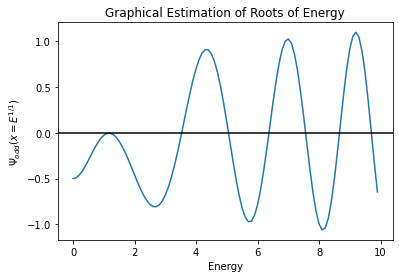

Some Energy levels are : 3.53370081785162
Some Energy levels are : 5.055511103674354
Some Energy levels are : 6.371855838926699
Some Energy levels are : 7.562817076621748
Some Energy levels are : 8.666177694353268
for value of n = 2


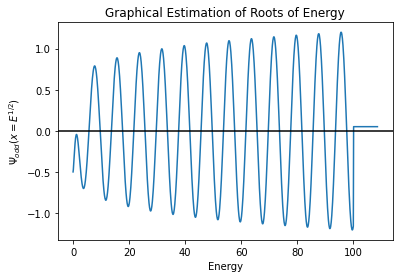

Some Energy levels are: 5.669234707454309
Some Energy levels are: 9.666478638187334
Some Energy levels are: 13.66420015064073
Some Energy levels are: 21.66294541610359
Some Energy levels are: 25.660391684257394
Some Energy levels are: 29.659899261731262
for value of n = 3


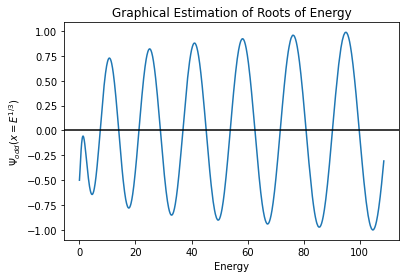

Some Energy levels are: 7.4039680092596285
Some Energy levels are: 14.023261393739608
Some Energy levels are: 21.235491548181987
Some Energy levels are: 28.89164820805863
Some Energy levels are: 45.21773023317652
for value of n = 4


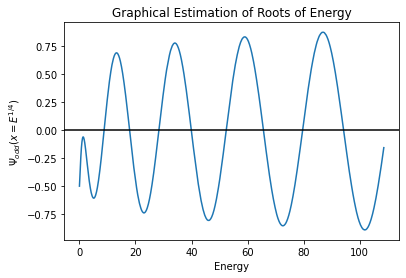

Some Energy levels are: 8.807393040407595
Some Energy levels are: 39.91261060931708
Some Energy levels are: 52.38300045608261
Some Energy levels are: 79.62750838027684


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


for value of n = 100


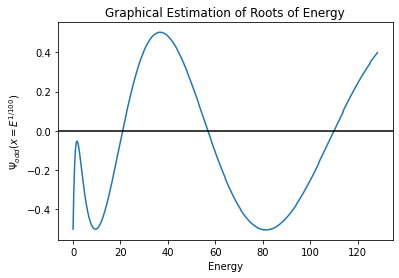

Energy levels are: 20.8834253892827


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


Energy levels are: 56.901248218100044
Energy levels are: 110.06724737018072


In [ ]:
#Plotting for roots and evaluating some energy levels:

rootalpha_matr_odd = np.zeros((6, 6))               #matrix of roots for different values of n
for n in [1, 2, 3, 4, 100]:
  dE = 0.1
  if n == 1:
    E_array = np.arange(0 , 1*(np.pi)**2 +dE , dE)
  elif n == 100:
    E_array = np.arange(0 , 13*(np.pi)**2 +dE , dE)
  else:
    E_array = np.arange(0 , 11*(np.pi)**2 +dE , dE)
  psi_bdry_array = np.zeros(len(E_array))

  for i in range(0, len(E_array))  :
    psi_bdry_array[i] = func(E_array[i])

  print("for value of n =", n)
  plt.plot(E_array , psi_bdry_array)
  plt.title( "Graphical Estimation of Roots of Energy")
  plt.xlabel('Energy')
  plt.ylabel( r'$\Psi_{odd}(x = E^{1/%d})$' %n)
  plt.axhline(c = "k")
  plt.show()
  if n == 1:
    j = 0
    for i in [3, 5, 6, 8, 9]:
      rootofen = optimize.newton(func, i, maxiter = 150)
      print("Some Energy levels are :", rootofen)
      rootalpha_matr_odd[j, 1] = rootofen
      j = j + 1
  elif n == 2:
    j = 0
    for i in [5, 10, 15, 20, 25, 30]:
      rootofen = optimize.newton(func, i, maxiter = 150)
      print("Some Energy levels are:", rootofen)
      rootalpha_matr_odd[j, 2] = rootofen
      j = j + 1
  elif n == 3:
    j = 0
    for i in [10, 15, 20, 30, 45]:
      rootofen = optimize.newton(func, i, maxiter = 150)
      print("Some Energy levels are:", rootofen)
      rootalpha_matr_odd[j, 3] = rootofen
      j = j + 1
  elif n == 4:
    j = 0
    for i in [10, 40, 50, 80]:
      rootofen = optimize.newton(func, i, maxiter = 150)
      print("Some Energy levels are:", rootofen)
      rootalpha_matr_odd[j, 4] = rootofen
      j = j + 1
  else:
    j = 0
    for i in [20, 50, 105]:
      rootofen = optimize.newton(func, i, maxiter = 150)
      print("Energy levels are:", rootofen)
      rootalpha_matr_odd[j, 5] = rootofen
      j = j + 1
  #plt.rcParams['figure.figsize'] = [5, 4]

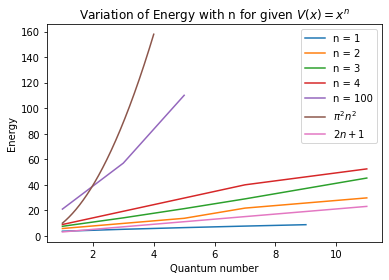

In [ ]:
#plotting Energies vs quantum number for different value of n for given potential V(x) = x^n

#defining arrays for different n as the size of non-zero root arrays are different in each case
n_1 = [1, 3, 5, 7, 9]
n_2 = [1, 3, 5, 7, 9, 11]
n_3 = [1, 3, 5, 7, 11]
n_4 = [1, 7, 11]
n_100 = [1, 3, 5]
n_sq = np.linspace(1, 4, 500)


plt.plot(n_1, np.delete(rootalpha_matr_odd[:, 1], 5), label = 'n = 1')      #numpy delete is used to delete the "zero" entries in array
plt.plot(n_2, rootalpha_matr_odd[:, 2], label = 'n = 2')
plt.plot(n_3, np.delete(rootalpha_matr_odd[:, 3], 5), label = 'n = 3' )
plt.plot(n_4, np.delete(rootalpha_matr_odd[:, 4], [3, 4, 5]), label = 'n = 4')
plt.plot(n_100, np.delete(rootalpha_matr_odd[:, 5], [3, 4, 5]), label = 'n = 100')
plt.plot(n_sq, np.power(np.pi*n_sq, 2), label = '$\pi^2 n^2$')
plt.plot(n_2, 2*np.array(n_2) + 1, label = '$2n+1$')
plt.title(r'Variation of Energy with n for given $V(x) = x^n$')
plt.xlabel( 'Quantum number' )
plt.ylabel('Energy')
plt.legend()

 from above plot, we observe that, as n is becoming large, Energy dependence on quantum number is reaching to $E \sim (Quantum \ number)^2$ .Thus, **we can say that energy levels approximate an infinite square well for large n**.
Also, from above plot, for the case $n = 2$ which is also known as potential for Quantum Harmonic Oscillator(QHO). We found that, $E \sim 2(Quantum \ number)$ which is fairly close to the actual (In our units): $E_{QHO} \sim 2(Quantum \ number) +1 $.

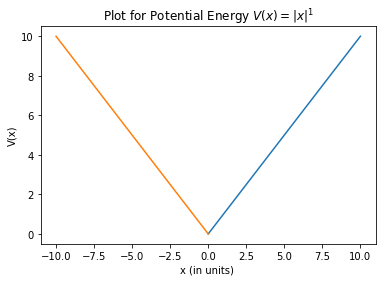

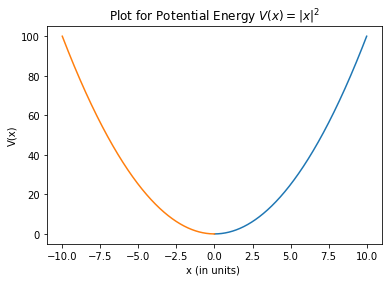

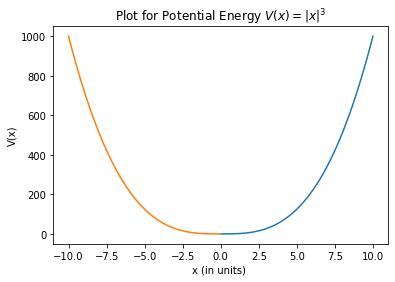

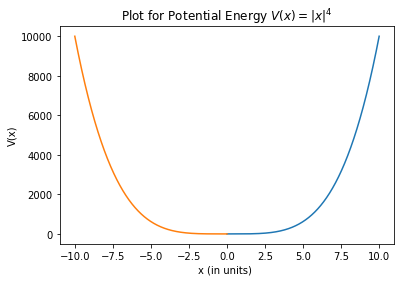

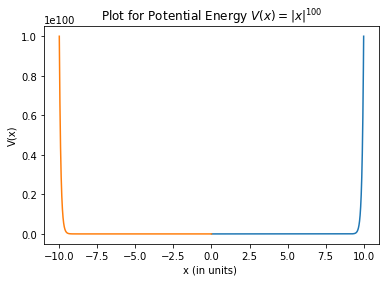

In [ ]:
#plotting V(x) = x^n for different values of n.

for n in [1, 2, 3, 4, 100]:
  plt.plot(xi, xi**n)
  plt.plot(-np.flip(xi), np.flip(xi**n))
  plt.xlabel('x (in units) ')
  plt.ylabel('V(x)')
  plt.title(r'Plot for Potential Energy $V(x) = |x|^{%d}$' %n)
  plt.show()

We observe from potential Energy plots that as the value of n is increasing the more it is resembling the infinite square well.
Intuitively, one can see that $\psi(x) \rightarrow 0$ as $V(x) \rightarrow \infty$
and, for $$V(x) = x^n$$
we know for range $-1 < x < 1$ as $n$ becomes large and larger, for this range $V(x) \simeq 0$
and for other regions, as $n$ becomes larger then $V(x) \rightarrow \infty$ for which  $\psi(x) \rightarrow 0$. These are the exact features of an infinite square well.

##PH509 QM Lab 3A

**Matching method:**

1. Implement the Numerov solver. Please state clearly how will you start the solver. Remember that you will need the first two initial values $\psi_0$ and $\psi_1$ to proceed.

2. Use the matching method to obtain the wave functions for the first few states of the Lennard-Jones potential. Compare how the energy eigenvalues change with the quantum number and compare it with the harmonic potential and infinite square well potential case.
use the form: \\
1-D Lennard-Jones Potential:

$$V_{LJ}(x) = 4\epsilon \left( \left( \frac{\sigma}{x} \right)^{12} - \left( \frac{\sigma}{x} \right)^{6} \right) $$

The energy eigenvalues can be solved by using secant method.

Adjust the depth of the potential well so that you get a few bound states (at least 3).

**Calculation of the uncertainity product**  $\Delta x \Delta p$

3. Verify the uncertianity product $\Delta x \Delta p > \frac{1}{2}$ for the first eigenstates of the Lennard-Jones potential.

you can calculate the $\Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}$. Where $x \equiv \frac{x}{a}$ is the dimensionless quantity, and

$$\langle x^n \rangle = \int_{-\infty}^{\infty} x^n | \psi(x)|^2 dx$$

similary, **argue** that for stationary states with real wavefunctions.

$$\Delta p = \sqrt{-\int_0^1 \psi(x) \frac{d^2}{dx^2}\psi(x) dx}$$

once you solve the Schrodinger equation, you will get the wavefunction $\psi(x)$. To be able to calculate $\Delta p$ you need a way to estimate its second derivative. This can be easily done with the central difference formula.

**Numerov Solver:**
This is an algorithm to the solve the second order differential equation which does not include first derivative term in their equations, such as Schrodinger Equation.
$$\frac{d^2}{dx^2}\psi(x) + K^2(x)\psi(x) = 0$$

In order to get the step-updation for Numerov solver. First, we do the *taylor expansion* for $\psi$ and do the algebra and evaluate the second derivative term as *Central difference theorem*. We get the Psi in terms of its previous values.

$$\psi(x+h) = \frac{2[1-\frac{5}{12}h^2K^2(x)]\psi(x) - [1+\frac{1}{12}h^2K^2(x-h)]\psi(x-h)}{\frac{1+h^2K^2(x+h)}{12}}$$

###**Numerov Solver**

In [ ]:
N = 1000                           #Number of iterations
Psi = np.zeros(N)                  #wavefunction
V = (-1)*np.ones(N)                #Potential array #Could be changed according to the problem
Ep = -1                            #Trial Energy
k2 = (Ep - V)                      #K-squared
h2 = (1.0/(N-1))**2                #h-squared

In [ ]:
def Numerov(ep, N):
  Psi[0] = 0         #first two values of Psi
  Psi[1] = 1e-5      #both initial Psi cannot be zero otherwise we will get the trivial solution Psi = 0

  for i in range(2, N):
   Psi[i] = (2*(1-(5/12)*h2*k2[i-1])*Psi[i-1]-(1+(1/12)*h2*k2[i-2])*Psi[i-2])/(1+(1/12)*h2*k2[i])
   return Psi

###Lennard-Jones Potential:
$$V_{LJ}(x) = 4\epsilon \left( \left( \frac{\sigma}{x} \right)^{12} - \left( \frac{\sigma}{x} \right)^{6} \right) $$

$$\frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x) + V_{LJ}(x)\psi(x) = E\psi(x)$$
$$ \frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x) + 4\epsilon \left( \left( \frac{\sigma}{x} \right)^{12} - \left( \frac{\sigma}{x} \right)^{6} \right)\psi(x) = E\psi(x) $$
choosing $\sigma$ as characteristic length: $x  = \sigma u$
$$ \frac{-\hbar^2}{2m\sigma^2}\frac{d^2}{du^2}\psi(u) + 4\epsilon \left( \left( \frac{1}{u} \right)^{12} - \left( \frac{1}{u} \right)^{6} \right)\psi(u) = E\psi(u) $$

choosing $$\epsilon = \frac{b\hbar^2}{2m\sigma^2}$$ (where, $b>0$)
and,
$$E = \frac{\alpha\hbar^2}{2m\sigma^2}$$
We have to find $\alpha$ using Matching method. Using above scalings, we get:
$$ -\frac{d^2}{du^2}\psi(u) + 4b \left( \left( \frac{1}{u} \right)^{12} - \left( \frac{1}{u} \right)^{6} \right)\psi(u) = \alpha\psi(u) $$
$$ \frac{d^2}{du^2}\psi(u) = 4b \left( \left( \frac{1}{u} \right)^{12} - \left( \frac{1}{u} \right)^{6} \right)\psi(u) - \alpha\psi(u) $$
\
$$\boxed{ \frac{d^2}{du^2}\psi(u) = \left[4b \left(  \frac{1}{u^{12}} -  \frac{1}{u^6}  \right) - \alpha \right]\psi(u) }$$

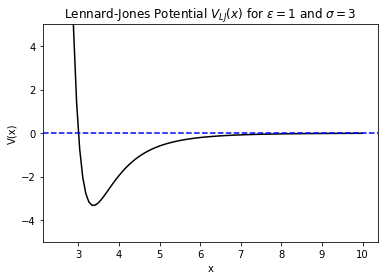

In [ ]:
#--Lennard Jones Potential :
# This is a rough plot of how the potential looks :

def LJP( x , sigma , e ) :

  v = 4*e*((sigma/x)**12 - (sigma/x)**6)

  return v

# calling the LJP function :

X = np.linspace( 2.5 , 10 , 100)
V = np.zeros(len(X))

for i in range(0 , len(X)):
  V[i]=  LJP(X[i] , 3 , 1 )   # sigma = 3 , e = 1

#plotting the potential :
vscale = 0.3
V1 = V/vscale
plt.plot( X , V1 , 'k-')
plt.xlabel( 'x' )
plt.ylabel( 'V(x)')
plt.axhline(0, ls='--', color='blue')
plt.ylim(-5, 5)
plt.title(r'Lennard-Jones Potential $V_{LJ}(x)$ for $\epsilon = 1$ and $\sigma = 3$')
plt.show()



In [ ]:
# Defining the Lennard-Jones Potential in adimensional form which is to be used in the problem :

def LJV1( x ) :

   b = 500.0
   V =  (4*b)*((1/(x**12)) - (1/(x**6)))

   return V

vectorV = np.vectorize(LJV1)

We need two helper function :
* RK4 solver
* Root finder (bisection method)

In [ ]:
#--Root Finder--

def root_bisect(f, a, b, eps, N):

  fa = f(a)
  fb = f(b)

  if fa*fb < 0:
    condn = True
    n = 1

    while (condn):

      r = 0.5 * (a + b)

      #-- change the interval
      fr = f(r)
      if fa*fr < 0:
        b = r
      else:
        a = r

      #-- increment the number of steps
      n = n + 1
      if n > N:
        raise ValueError("Convergence not found in %d steps! \n" %(N))

      condn = abs(fr) > eps

    return r, n

  else:
    raise ValueError("No root in the specified interval (%f, %f)" %(a, b))

In [ ]:
#==== Runge Kutta 4th order solver ====#

def rk4_solve(x, dydx, y0 , alpha):

  dx = x[1] - x[0]

  #-- initial values
  y_sol = np.zeros( (len(x), y0.shape[0]) )
  y_sol[0] = y0

  #-- step in x
  for k in np.arange(0, len(x)-1):

    k1 = dydx(x[k], y_sol[k], alpha)
    k2 = dydx(x[k] + 0.5*dx, y_sol[k] + 0.5*dx*k1, alpha)
    k3 = dydx(x[k] + 0.5*dx, y_sol[k] + 0.5*dx*k2, alpha)
    k4 = dydx(x[k] + dx, y_sol[k] + dx*k3, alpha)

    y_sol[k+1] = y_sol[k] + dx*(k1/6. + k2/3. + k3/3. + k4/6.)

    #print (x[k+1], y_sol[k+1])

  return y_sol

In [ ]:
# defining the derivative function for the potential :

def rhs_LJP(xk, yk, alpha):
  psi_k = yk[0]
  dpsi_k = yk[1]

  dydx = np.array([dpsi_k, (LJV1(xk) - alpha)*psi_k])

  return dydx

## Finding eigenvalues (and bound states) in a systematic manner :

If $E$ is an eigenvalue, then the logarithmic derivative of the wavefunction must satisfy:
$$\frac{\psi'_L(x_M)}{\psi_L(x_M)} =  \frac{\psi'_R(x_M)}{\psi_R(x_M)}$$

We now go about to seek eigenvalues E for which the above is true.

We will scan through in E, and note down those for which

$$
f(E, x_M) = \left [\frac{\psi'_L(x_M)}{\psi_L(x_M)} -  \frac{\psi'_R(x_M)}{\psi_R(x_M)} \right ]_E = 0
$$

In other words, we have find the roots of the function $f(E, x_M)$.

In [ ]:
b = 100.0
# function to return the difference in log derivatives of the L and R wavefunctions
# at the given matching point

def calcDiffLogDerivative(ek):

  #-- decide where to match the solution
  xM = 1.5

  #-- L->R solution
  dx = 1./100
  xstart = 0.90
  xL2R = np.arange(xstart, xM+dx, dx)
  y0 = np.array([0.0, 1.e-8]) #-- initial condition for L--> R solution
  yL2R = rk4_solve(xL2R, rhs_LJP, y0, ek)

  #-- R->L solution
  dx = 1./100
  xend = 2.5
  xR2L = np.arange(xend, xM-dx, -dx)
  y0 = np.array([0.0, 1.e-8]) #-- initial condition for L--> R solution
  yR2L = rk4_solve(xR2L, rhs_LJP, y0, ek)

  # at the matching point, the diff in log derivatives
  diffLogDer = yR2L[-1, 1]/yR2L[-1, 0] - yL2R[-1, 1]/yL2R[-1, 0]

  return diffLogDer



In [ ]:
# Finding the difference of Logarithmic Derivative :

de = 0.1
e = np.arange(-499.99 , 0. , de)

diffLD = np.zeros(len(e))

for i in range(0 , len(e)) :
  diffLD[i] = calcDiffLogDerivative(e[i])


Text(0.5, 1.0, 'Graphical Estimation of the energies that satisfy the imposed conditions')

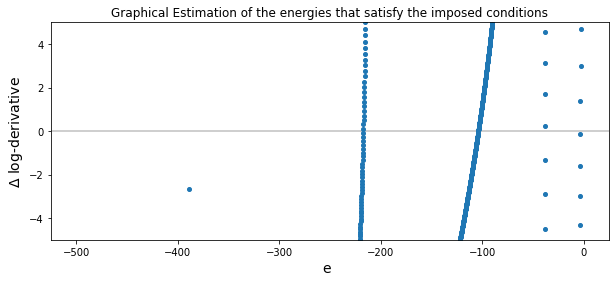

In [ ]:
#-- plot dffLD vs e

plt.figure(figsize=(10,4))
plt.axhline(0, ls='-', color='silver')

plt.plot(e, diffLD, 'o', markersize=4)

plt.ylim(-5, 5)
plt.xlabel(r'e ', fontsize=14)
plt.ylabel(r'$\Delta$ log-derivative', fontsize=14)
plt.title('Graphical Estimation of the energies that satisfy the imposed conditions')

The Energy Eigen Values are obtained as :

In [ ]:
esol, n = root_bisect(calcDiffLogDerivative, -230., -210., 1.e-8, 200)

print ("e_sol = %.12f, found in %d steps"%(esol, n))

e_sol = -217.147248107940, found in 31 steps


In [ ]:
esol, n = root_bisect(calcDiffLogDerivative, -110., -100., 1.e-8, 200)

print ("e_sol = %.12f, found in %d steps"%(esol, n))

e_sol = -103.897710777819, found in 29 steps


In [ ]:
esol, n = root_bisect(calcDiffLogDerivative, -10., 0., 1.e-8, 200)

print ("e_sol = %.12f, found in %d steps"%(esol, n))

e_sol = -3.281310227467, found in 34 steps


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide


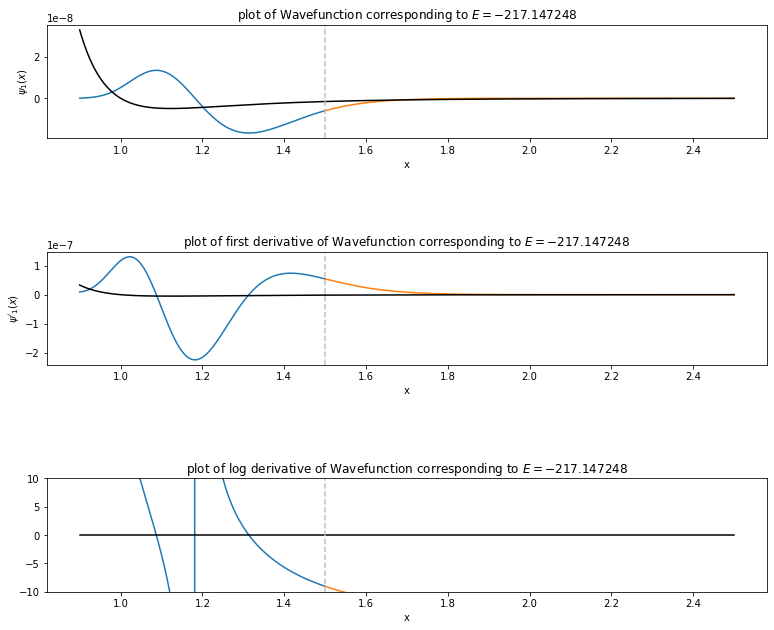

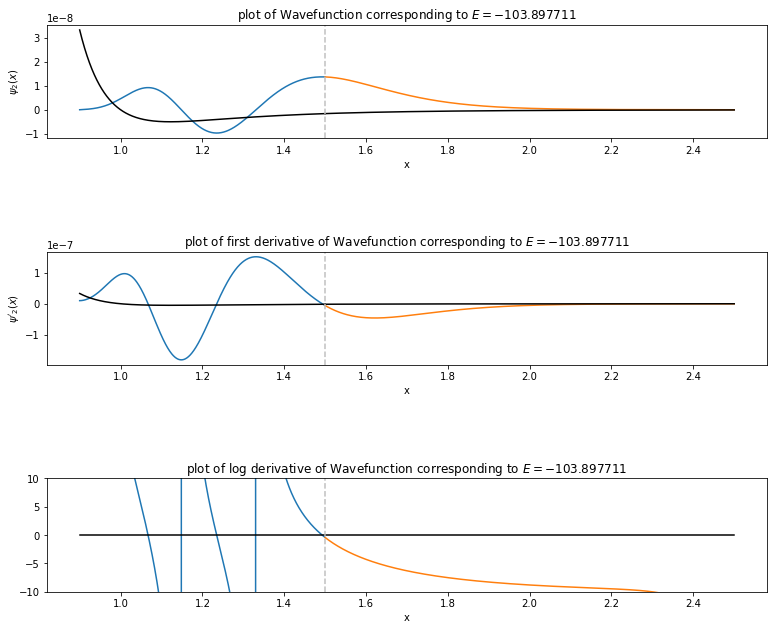

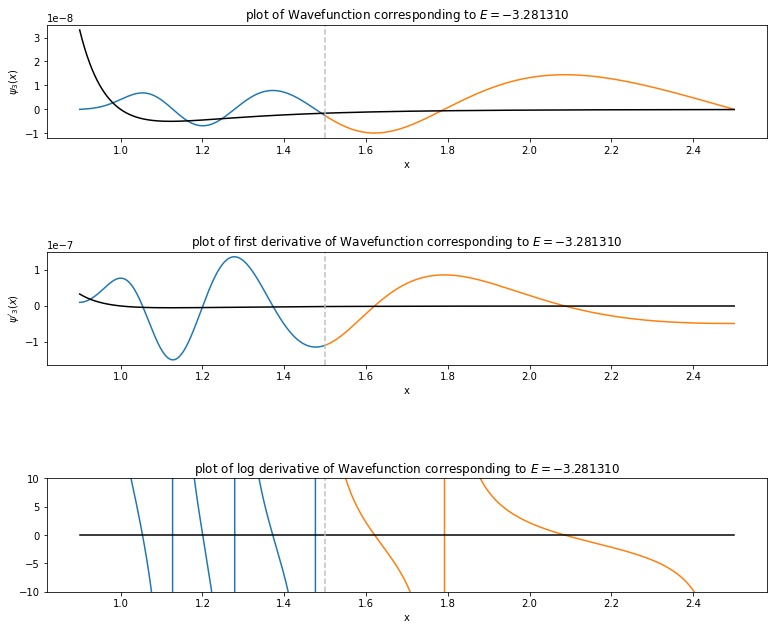

In [ ]:
j = 0
for alpha in [-217.147248107940, -103.897710777819, -3.281310227467] :

  #-- decide where to match the solution
  #for sigma=3 , we take xM = 4.5
  xM = 1.5

  #-- L->R solution
  dx = 1./1000
  xstart = 0.90
  xL2R = np.arange(xstart, xM+dx, dx)
  y0 = np.array([0.0, 1.e-8]) #-- initial condition for L--> R solution
  yL2R = rk4_solve(xL2R, rhs_LJP, y0 , alpha )

  #-- R->L solution
  dx = 1./1000
  xend = 2.5
  xR2L = np.arange(xend, xM-dx, -dx)
  y0 = np.array([0.0, 1.e-8]) #-- initial condition for L--> R solution
  yR2L = rk4_solve(xR2L, rhs_LJP, y0 , alpha)

  #-- plot the solution for some arbitrary energy
  plt.figure(figsize=(10, 9))

  #-------------
  plt.subplot(3,1,1) #-- wavefunction

  #-- let's make the waveform match at xM
  r = yR2L[-1, 0]/yL2R[-1, 0]

  #print('r = %.6f'%r)

  plt.plot(xL2R, yL2R[:, 0])
  plt.plot(xR2L, yR2L[:, 0]/r)
  plt.xlabel('x')
  plt.ylabel('$\psi_{%d}(x)$' %(j + 1))
  plt.title('plot of Wavefunction corresponding to $E = {%f}$' %alpha)

  #-- potential
  vscale = 1.e11
  plt.plot(xL2R, vectorV(xL2R)/vscale, 'k-')
  plt.plot(xR2L, vectorV(xR2L)/vscale, 'k-')

  #-- mark the matching point
  plt.axvline(xM, ls='--', color='silver')

  #-------------
  plt.subplot(3,1,2) #-- derivative of the wavefunction
  plt.plot(xL2R, yL2R[:, 1])
  plt.plot(xR2L, yR2L[:, 1]/r)
  plt.xlabel('x')
  plt.ylabel('$\psi\'_{%d}(x)$' %(j + 1))
  plt.title('plot of first derivative of Wavefunction corresponding to $E = {%f}$' %alpha)

  #-- potential
  vscale = 1.e11
  plt.plot(xL2R, vectorV(xL2R)/vscale, 'k-')
  plt.plot(xR2L, vectorV(xR2L)/vscale, 'k-')

  #-- mark the matching point
  plt.axvline(xM, ls='--', color='silver')

  #-------------
  plt.subplot(3,1,3) #-- log-derivstive of the wavefunction
  plt.plot(xL2R, yL2R[:, 1]/yL2R[:,0])
  plt.plot(xR2L, yR2L[:, 1]/yR2L[:,0])
  plt.ylim(-10, 10)
  plt.xlabel('x')
  #plt.ylabel('$\frac{\psi\'(x)}{\psi_{%d}(x)}$' %(j+1))
  plt.title('plot of log derivative of Wavefunction corresponding to $E = {%f}$' %alpha)

  #-- potential
  vscale = 1.e11
  plt.plot(xL2R, vectorV(xL2R)/vscale, 'k-')
  plt.plot(xR2L, vectorV(xR2L)/vscale, 'k-')


  #-- mark the matching point
  plt.axvline(xM, ls='--', color='silver')
  j = j+1
  #print("j is equal to:", j)
  plt.subplots_adjust(left=0 , right=1 , top=1 , wspace=0.5 , hspace=1)

Text(0.5, 1.0, 'Variation of Energy of bound states with quantum number for Lennard-Jones potential')

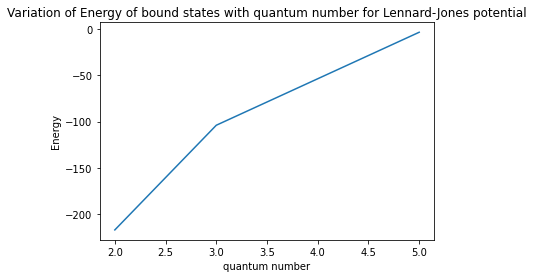

In [ ]:
#Plotting Energy vs Quantum number

quant_num = [2, 3, 5]
Energy_LJ = [-217.147248107940, -103.897710777819, -3.281310227467]
plt.plot(quant_num, Energy_LJ)
plt.xlabel('quantum number')
plt.ylabel('Energy')
plt.title('Variation of Energy of bound states with quantum number for Lennard-Jones potential')

##Calculation of uncertainty product :

**Heisenberg's uncertainty principle:**
$$\Delta x \Delta p \geq \frac{\hbar}{2}$$
$$\frac{\Delta x}L L\Delta p \geq \frac{\hbar}{2}$$
$$\frac{\Delta x}L L\frac{\Delta p}{\hbar} \geq \frac{1}{2}$$
\
$$\boxed{\Delta\tilde{x} \Delta\tilde{p} \geq \frac{1}{2}}$$

where,
$$\Delta \tilde{x} = \frac{\Delta x}{L} $$
$$\Delta \tilde{p} = \frac{L}{\hbar}\Delta p $$

where we can calculate the uncertainty in $\Delta \tilde{x}$ as: \

$$\Delta \tilde{x} = \sqrt{\langle \tilde{x}^2 \rangle - \langle \tilde{x} \rangle^2} $$

and to calculate the expectation values, we use:

$$\langle \tilde{x}^n \rangle = \int_{-\infty}^{\infty} \tilde{x}^n |\psi(\tilde{x})|^2 d\tilde{x} $$

and we can use same calculation for the uncertainty in $\Delta \tilde{p}$ as: \

$$\Delta \tilde{p} = \sqrt{\langle \tilde{p}^2 \rangle - \langle \tilde{p} \rangle^2} $$

However, Here we argue that for **real** wavefunctions the value of expectation of momentum is always equal to zero.

That means,

for all **real** $\psi(x)$  the value is always:

$$\langle \tilde{p} \rangle = 0$$  

***Proof:***

$$\langle \tilde{p} \rangle = \int_{-\infty}^{\infty} \psi^*(\tilde{x})\tilde{p} \psi(\tilde{x}) d\tilde{x} $$

$\psi(\tilde{x})$ is **real** $\Rightarrow$ $\psi^*(\tilde{x}) = \psi(\tilde{x})$. Moreover, $p = -i\hbar\frac{d}{dx} \Rightarrow \tilde{p} = -i\frac{d}{d\tilde{x}}$

$$\langle \tilde{p} \rangle = \int_{-\infty}^{\infty} \psi(\tilde{x}) \Big{(}-i\frac{d}{d\tilde{x}}\Big{)} \psi(\tilde{x}) d\tilde{x} $$

$$\langle \tilde{p} \rangle = -i\int_{-\infty}^{\infty} \psi(\tilde{x})\psi'(\tilde{x}) d\tilde{x} $$

Using Integration by parts,

$$\langle \tilde{p} \rangle = -i[\psi(\tilde{x})\psi(\tilde{x})]\Big{|}_{-\infty}^{\infty} + i\int_{-\infty}^{\infty} \psi'(\tilde{x})\psi(\tilde{x}) d\tilde{x} $$

as $\tilde{x} \rightarrow \pm \infty, |\psi(\tilde{x})|^2 \rightarrow 0$

$$\langle \tilde{p} \rangle = -\langle \tilde{p} \rangle $$

$\Rightarrow$

$$\boxed{ \  \langle \tilde{p} \rangle = 0      \ } $$

$\Rightarrow$
$$\Delta \tilde{p} = \sqrt{\langle \tilde{p}^2 \rangle} $$

$$\langle \tilde{p}^2 \rangle = \int_{-\infty}^{\infty} \psi^*(\tilde{x})\tilde{p}^2 \psi(\tilde{x}) d\tilde{x} $$

$\psi(\tilde{x})$ is **real** $\Rightarrow$ $\psi^*(\tilde{x}) = \psi(\tilde{x})$. Moreover, $p = -i\hbar\frac{d}{dx} \Rightarrow \tilde{p} = -i\frac{d}{d\tilde{x}}$

$$\langle \tilde{p}^2 \rangle = \int_{-\infty}^{\infty} \psi(\tilde{x}) \Big{(}-i\frac{d}{d\tilde{x}}\Big{)}^2 \psi(\tilde{x}) d\tilde{x} $$

$$\langle \tilde{p}^2 \rangle = -\int_{-\infty}^{\infty} \psi(\tilde{x})\psi''(\tilde{x}) d\tilde{x} $$

$\Rightarrow$

$$\Delta \tilde{p} = \sqrt{-\int_{-\infty}^{\infty} \psi(\tilde{x})\frac{d^2}{d\tilde{x}^2} \psi(\tilde{x}) d\tilde{x}} $$

Wher we can calculate the $\frac{d^2}{d\tilde{x}^2} \psi(\tilde{x})$ using finite-difference method:

$$\frac{d^2}{d\tilde{x}^2} \psi(\tilde{x}) \simeq \frac{\psi_{j+1}(\tilde{x}) -2 \psi_{j}(\tilde{x}) + \psi_{j-1}(\tilde{x})}{\delta \tilde x}$$

$\delta \tilde{x}$ is the step-size. \

Alternatively, We can also use our Schrodinger Equation to calculate the second derivative (Because we now know the value of Energy Eigenvalue)

In [ ]:
#Calculation of Uncertainty in Momentum and position and calculation of Uncertainty product:

for E1 in [-217.147248107940, -103.897710777819, -3.281310227467]:
  M = 1.5

  #-- L->R solution
  dx = 1./1000
  xstart = 0.90
  xL2R = np.arange(xstart, xM+dx, dx)
  y0 = np.array([0.0, 1.e-8]) #-- initial condition for L--> R solution
  yL2R1 = rk4_solve(xL2R, rhs_LJP, y0 , E1 )

  #-- R->L solution
  dx = 1./1000
  xend = 2.5
  xR2L = np.arange(xend, xM-dx, -dx)
  y0 = np.array([0.0, 1.e-8]) #-- initial condition for L--> R solution
  yR2L1 = rk4_solve(xR2L, rhs_LJP, y0 , E1)

  #the vector y1 containing the psi and dpsi/dx from x=0.9 to x=2.5
  #print(len(yL2R1))
  y1_n = np.delete(yL2R1[:, 0], -1)
  y1 = np.concatenate((y1_n , yR2L1[:, 0]))
  x = np.arange(xstart , xend+dx , dx)
  #print(len(x))
  #print(y1.shape[0])
  #print(y1)

  # array for values of x along which the wavefunctions values are obtained
  xn = np.arange(xstart , xend+dx , dx)

  # array for the values of psi^2 :
  I = np.array(y1)*np.array(y1)

  # array for the values of x^2 :
  X = np.array(xn)*np.array(xn)

  # array for the values of (x.psi^2) :
  J = np.array(I)*np.array(xn)

  # array for the values of (x^2.psi^2) :
  K = np.array(X)*np.array(I)

  # expectation value of x in the eigen state with energy
  X_m = np.trapz(J, x = xn)

  # expectation value of x^2 in the eigen state with energy
  X2_m = np.trapz(K , x = xn)

  # calculation of uncertainty in position :

  del_x = np.sqrt( (X2_m) - (X_m)**2 )


  #calculating second derivative of Psi using Schrodinger equation for a given E using:       second derivative of Psi = (V(x) - E)*Psi
  psi2d1 = np.array(vectorV(xn) - E1*np.ones(len(xn)))*np.array(y1)

  #calculating product of Psi and second-derivative of Psi
  expecp = np.array(y1)*psi2d1

  #calculating Integral of product of Psi and second-derivative of Psi
  expect_of_p2 = np.trapz(expecp, x = xn)
  #print(expect_of_p2)
  if expect_of_p2 < 0:
    del_p = np.sqrt(-1*expect_of_p2)
  else:
    del_p = np.sqrt(expect_of_p2)

  #Normalization Factor
  normI = np.trapz(I, x = xn)

  #Normalized Uncertainty in Momentum
  delta_p = del_p/normI
  #print("Uncertainty in Momentum:", delta_p)

  #Normalized Uncertainty in Position
  delta_x = del_x/normI

  #Product of uncertainties
  prod = delta_x*delta_p

  print("product of uncertainty:",prod)

product of uncertainty: 20198433604.123417
product of uncertainty: 97187947607316.64
product of uncertainty: 1.3072834531077722e+18


Hence, Uncertainty Product $\Delta \tilde{x} \Delta \tilde{p}$ calculated for the bound states of Lennard-Jones Potential satisfy the Heisenberg Uncertainty product:
$$\Delta \tilde{x} \Delta \tilde{p} \geq \frac{1}{2}$$